In [1]:
%matplotlib notebook

# Predict survival on the Titanic 泰坦尼克生还预测

Original data set is from [Kaggle](https://www.kaggle.com/c/titanic/data)

## 1. Question Description 问题描述
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we will complete the analysis of what sorts of people were likely to survive. In particular, we will apply the tools of machine learning to predict which passengers survived the tragedy.

## 2. Data Dictionary 数据字典

Variable|Definition|Key
--|--|--
PassengerId|Passenger Id(乘客ID)|
Survival|Survival(是否获救了)|0 = No, 1 = Yes
Pclass|Ticket class(几等仓)|1 = 1st, 2 = 2nd, 3 = 3rd
Name|姓名|
Sex|性别|
Age|年龄|
SibSp|# of siblings / spouses aboard the Titanic(兄弟姐妹数量)|
Parch|# of parents / children aboard the Titanic(带了几个老人孩子)|
Ticket|Ticket number(票号)|
Fare|Passenger fare|
Cabin|Cabin number(房间号)|
Embarked|Port of Embarkation（出发港)|C = Cherbourg, Q = Queenstown, S = Southampton

## 3. Some teminology we should know 术语

- Train Data Set 训练集
- Test Data Set 测试集
- Sample 样本
- Feature 特征


## 4. Data Description 数据描述

**1.Load the train data(titanic_train.csv) and test data(titanic_test.csv) into the application 将训练数据(titanic_train.csv)和测试数据（titanic_test.csv)加载到应用**

In [2]:
import pandas

#load train and test data
titanic_df = pandas.read_csv("titanic_train.csv")
test_df = pandas.read_csv("titanic_test.csv")

**2.Have a view with the train data and test data 对训练数据和测试数据进行观察**

The train data:

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The test data:

In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**3. Get the general infomation about the data 获取数据的一般信息**

We can get the total account of each features:

In [5]:
print("-----------------Train Data-------------")
titanic_df.info()

-----------------Train Data-------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
print("-----------------Test Data-------------")
test_df.info()

-----------------Test Data-------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


The meaning of each item：
- count:数量
- mean：均值
- std: standard deviation 标准方差
- min: minimum value 最小值
- 25%: quartile 25%位置的值
- 50%：median 中值
- 75%：quartile 75%位置的值
- max：maximum value 最大值

We can see that there are several missing value in column "Age" and "Cabin".在“Age”和“Cabin”列，存在缺失值

## 5. Data Preprocessing 数据预处理

### 5.1 Drop Unnecessary Columns/Features 去除不必要的列/特征

In [9]:
titanic_df = titanic_df.drop(['PassengerId','Name','Ticket'], axis=1)
test_df = test_df.drop(['Name','Ticket'], axis=1)

In [10]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [11]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,7.8292,NaN,Q
1,893,3,female,47.0,1,0,7.0000,NaN,S
2,894,2,male,62.0,0,0,9.6875,NaN,Q
3,895,3,male,27.0,0,0,8.6625,NaN,S
4,896,3,female,22.0,1,1,12.2875,NaN,S


### 5.2 Process the Missing Value 缺失值处理

For the Cabin Column, it has a lot missing values. So it's impossible for us to utilize it to analysis. Just drop it.

In [12]:
titanic_df.drop("Cabin",axis=1,inplace=True)
test_df.drop("Cabin",axis=1,inplace=True)

"Age" column is also missing in train and test data. We need to fill it. Here we can generate the age in one std within the mean.

<IPython.core.display.Javascript object>


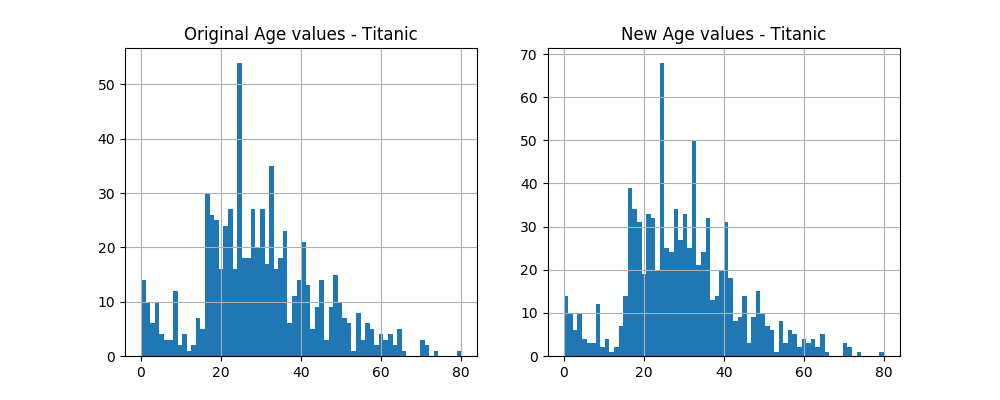

d:\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
d:\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [13]:
import numpy as np
import matplotlib.pyplot as plt

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,4))
axis1.set_title('Original Age values - Titanic')
axis2.set_title('New Age values - Titanic')

# get average, std, and number of NaN values in titanic_df
average_age_titanic   = titanic_df["Age"].mean()
std_age_titanic       = titanic_df["Age"].std()
count_nan_age_titanic = titanic_df["Age"].isnull().sum()

# get average, std, and number of NaN values in test_df
average_age_test   = test_df["Age"].mean()
std_age_test       = test_df["Age"].std()
count_nan_age_test = test_df["Age"].isnull().sum()

# generate random numbers between (mean - std) & (mean + std)
rand_1 = np.random.randint(average_age_titanic - std_age_titanic, average_age_titanic + std_age_titanic, size = count_nan_age_titanic)
rand_2 = np.random.randint(average_age_test - std_age_test, average_age_test + std_age_test, size = count_nan_age_test)

# plot original Age values
# NOTE: drop all null values, and convert to int
titanic_df['Age'].dropna().astype(int).hist(bins=70, ax=axis1)
# test_df['Age'].dropna().astype(int).hist(bins=70, ax=axis1)

# fill NaN values in Age column with random values generated
titanic_df["Age"][np.isnan(titanic_df["Age"])] = rand_1
test_df["Age"][np.isnan(test_df["Age"])] = rand_2

# convert from float to int
titanic_df['Age'] = titanic_df['Age'].astype(int)
test_df['Age']    = test_df['Age'].astype(int)
        
# plot new Age Values
titanic_df['Age'].hist(bins=70, ax=axis2)
plt.show()


"Embark" also misses two values. We can fill it with the most occurred value, which is "S".

In [14]:
titanic_df.mode()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,24,0,0,8.05,S


In [15]:
titanic_df["Embarked"] = titanic_df["Embarked"].fillna("S")

"Fair" in the test data is also missing one value. We can fill it with just median value.

In [16]:
test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)

titanic_df['Fare'] = titanic_df['Fare'].astype(int)
test_df['Fare']    = test_df['Fare'].astype(int)

After that, we can check the train and test data again

In [17]:
print("-----------------Train Data-------------")
titanic_df.info()
print("-----------------Test Data-------------")
test_df.info()

-----------------Train Data-------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null int32
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null int32
Embarked    891 non-null object
dtypes: int32(2), int64(4), object(2)
memory usage: 48.8+ KB
-----------------Test Data-------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            418 non-null int32
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null int32
Embarked       418 non-null object
dtypes: int32(2), int64(4), object(2)
memory usage: 22.9+ KB


### 5.3 Processing the Categorial Variables  类别数据的处理
1.For the sex column, we can transform it to integer. 0 is for male and 1 for female.
对于性别，只有男性和女性。我们需要转换为数值，可以转化成int或者float。这里我们把0表示male, 1表示female。

First, we can see the unique values of the sex column
首先，我们来看Sex列有几种值

In [18]:
print(titanic_df["Sex"].unique())

['male' 'female']


Let's transform the sex to integer.

In [19]:
titanic_df.loc[titanic_df["Sex"] == "male", "Sex"] = 0
titanic_df.loc[titanic_df["Sex"] == "female", "Sex"] = 1
test_df.loc[test_df["Sex"] == "male", "Sex"] = 0
test_df.loc[test_df["Sex"] == "female", "Sex"] = 1
titanic_df['Sex'] = titanic_df['Sex'].astype(int)
test_df['Sex']    = test_df['Sex'].astype(int)

2."Embarked" column has 3 different values, and we can divide it to 3 diffrent columns

In [20]:
print(titanic_df["Embarked"].value_counts())

S    646
C    168
Q     77
Name: Embarked, dtype: int64


In [21]:
embark_dummies_titanic  = pandas.get_dummies(titanic_df['Embarked'],prefix='embarked')
embark_dummies_test  = pandas.get_dummies(test_df['Embarked'],prefix='embarked')
titanic_df = titanic_df.join(embark_dummies_titanic)
test_df    = test_df.join(embark_dummies_test)

titanic_df.drop(['Embarked'], axis=1,inplace=True)
test_df.drop(['Embarked'], axis=1,inplace=True)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S
0,0,3,0,22,1,0,7,0,0,1
1,1,1,1,38,1,0,71,1,0,0
2,1,3,1,26,0,0,7,0,0,1
3,1,1,1,35,1,0,53,0,0,1
4,0,3,0,35,0,0,8,0,0,1


In [22]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S
0,892,3,0,34,0,0,7,0,1,0
1,893,3,1,47,1,0,7,0,0,1
2,894,2,0,62,0,0,9,0,1,0
3,895,3,0,27,0,0,8,0,0,1
4,896,3,1,22,1,1,12,0,0,1


3."Pclass" column is also a catategorial variables

In [23]:
pclass_dummies_titanic  = pandas.get_dummies(titanic_df['Pclass'],prefix='pclass')
pclass_dummies_test  = pandas.get_dummies(test_df['Pclass'], prefix='pclass')
titanic_df = titanic_df.join(pclass_dummies_titanic)
test_df    = test_df.join(pclass_dummies_test)

titanic_df.drop(['Pclass'], axis=1,inplace=True)
test_df.drop(['Pclass'], axis=1,inplace=True)
titanic_df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,pclass_1,pclass_2,pclass_3
0,0,0,22,1,0,7,0,0,1,0,0,1
1,1,1,38,1,0,71,1,0,0,1,0,0
2,1,1,26,0,0,7,0,0,1,0,0,1
3,1,1,35,1,0,53,0,0,1,1,0,0
4,0,0,35,0,0,8,0,0,1,0,0,1


In [24]:
test_df.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,pclass_1,pclass_2,pclass_3
0,892,0,34,0,0,7,0,1,0,0,0,1
1,893,1,47,1,0,7,0,0,1,0,0,1
2,894,0,62,0,0,9,0,1,0,0,1,0
3,895,0,27,0,0,8,0,0,1,0,0,1
4,896,1,22,1,1,12,0,0,1,0,0,1


Till now, we have finished all the preprocessing of the data.

In [25]:
print("-----------------Train Data-------------")
titanic_df.info()
print("-----------------Test Data-------------")
test_df.info()

-----------------Train Data-------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Survived      891 non-null int64
Sex           891 non-null int32
Age           891 non-null int32
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null int32
embarked_C    891 non-null uint8
embarked_Q    891 non-null uint8
embarked_S    891 non-null uint8
pclass_1      891 non-null uint8
pclass_2      891 non-null uint8
pclass_3      891 non-null uint8
dtypes: int32(3), int64(3), uint8(6)
memory usage: 36.6 KB
-----------------Test Data-------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Sex            418 non-null int32
Age            418 non-null int32
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null int32
embarked_C     418 non-null uint8
embarked_Q     4

## 6. Data Analysis 数据分析

### 6.1 define training and testing sets 定义训练和测试集

In [26]:
X_train = titanic_df.drop("Survived",axis=1)
Y_train = titanic_df["Survived"]
X_test  = test_df.drop("PassengerId",axis=1).copy()

In [27]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

X_train_np = X_train.as_matrix()
Y_train_np = Y_train.as_matrix()
X_train_headers = X_train.columns.values

#fig, axes = plt.subplots(11, 1, figsize=(10, 20))
survived = X_train_np[Y_train_np == 1]
unsurvived = X_train_np[Y_train_np == 0]

# ax = axes.ravel()

# for i in range(11):
#     _, bins = np.histogram(X_train_np[:, i], bins=50)
#     ax[i].hist(survived[:, i], bins=bins, color='red', alpha=.5)
#     ax[i].hist(unsurvived[:, i], bins=bins, color='yellow', alpha=.5)
#     ax[i].set_title(X_train_headers[i])
#     ax[i].set_yticks(())

# ax[0].set_xlabel("Feature")
# ax[0].set_ylabel("Frequency")
# ax[0].legend(["Survived", "Unsurvived"], loc="best")
# fig.tight_layout()
# plt.show()

### 6.2 Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
logreg.score(X_train, Y_train)

0.79797979797979801

In [29]:
from pandas import DataFrame
# get Correlation Coefficient for each feature using Logistic Regression
coeff_df = DataFrame(titanic_df.columns.delete(0))
coeff_df.columns = ['Features']
coeff_df["Coefficient Estimate"] = pandas.Series(logreg.coef_[0])

# preview
coeff_df

,Features,Coefficient Estimate
0,Sex,2.613627
1,Age,-0.035403
2,SibSp,-0.312391
3,Parch,-0.087117
4,Fare,0.002865
5,embarked_C,0.169697
6,embarked_Q,0.144168
7,embarked_S,-0.268304
8,pclass_1,0.943102
9,pclass_2,0.135255


### 6.3 Random Forest

Why random forest?
Random forest is derived from decision tree. In decision tree, each feature is processed separately, and the possible splits of the data don't depend on scaling, no preprocessing like normalization or standardization of features is needes for decision tree algorithms. In particular, decision trees work well when you have features that are on completely different scales, or a mix of binary and continuous features.

![](CART_tree_titanic_survivors.png)

But a main drawback of decision trees is that they tend to overfit the training data. **Random forests** are one way to address this problem. A random forests is essentially a collection of decision trees, where each tree is slight different from others. The idea behind random forests is that each tree might do a relatively good job of predicting, but will likey overfit in different ways, we can reduce the amount of overfitting by averaging their results. Random forests get their name from injecting randomness into the tree building to ensure each tree is different.

In [31]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)

0.96857463524130194

<IPython.core.display.Javascript object>


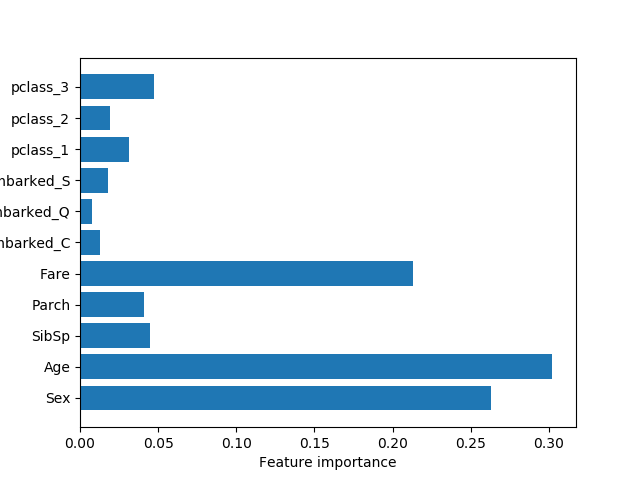

In [37]:
def plot_importance_feature(model):
    plt.figure(0)
    n_features = X_train_np.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train_headers)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.show()
    
plot_importance_feature(random_forest)

**Ways to improve:**
1. We can see that the **age**, **Sex**， **Fare** have a greater importance than others, so we can select just those features to train again.
2. Parch and Sibsp are actually family members, we can combine them into one feature "Family members" and drop the Parch and Sibsp columns.


### 6.4 Save the result

In [43]:
result = pandas.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
result.to_csv('titanic_result.csv', index=False)

In [44]:
result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
